In [120]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from sklearn.covariance import ledoit_wolf, oas

eps = 1e-5
%matplotlib inline
matplotlib.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{mathtools}')
matplotlib.rcParams["figure.facecolor"] = "white"
matplotlib.rcParams["axes.facecolor"] = "white"
matplotlib.rcParams["savefig.facecolor"] = "white"

save_fig = lambda x : plt.savefig("figs/" + x, bbox_inches='tight')

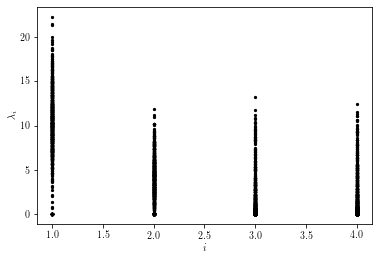

In [102]:
m = 3
n = 4
num_of_matrix = 1000

xs = np.linspace(1, n, n)
for i in range(num_of_matrix):
    A = np.random.uniform(low=-2, high=2, size=(m, n))
    vals = np.linalg.eigvals(A.T.dot(A))
    plt.scatter(xs, vals, s=5, c='k')
plt.ylabel("$\lambda_i$")
plt.xlabel("$i$")
plt.show()

In [42]:
A = np.random.uniform(low=-2, high=2, size=(m, n))

print("A =\n", str(A) + "\n")

print("Trace 1:", np.trace(A.T.dot(A)))
print("Trace 2:", np.trace(A.dot(A.T)))

print("\nDeterminant 1:", np.linalg.det(A.T.dot(A)))
print("Determinant 2:", np.linalg.det(A.dot(A.T)))

# Eigen values and vectors
values, vectors = np.linalg.eig(A.T.dot(A))
values1, vectors1 = np.linalg.eig(A.dot(A.T))
print("\nEigen values 1:", values)
print("Eigen vectors 1:\n", vectors)

print("\nEigen values 2:", values1)
print("Eigen vectors 2:\n", vectors1)

A =
 [[ 1.99885987  0.2839253  -0.78263665  0.34889867]
 [-0.21727411 -0.2890356  -0.01891991  1.56020022]
 [-0.14378555  0.91479225  0.41634955 -0.21928257]]

Trace 1: 8.454588022371262
Trace 2: 8.454588022371262

Determinant 1: -5.729547780553791e-16
Determinant 2: 11.223458286027416

Eigen values 1: [ 4.86453683e+00  2.75153859e+00 -1.10343307e-16  8.38512599e-01]
Eigen vectors 1:
 [[ 0.90163015  0.19877076  0.38405102 -0.00762062]
 [ 0.07138513  0.34973314 -0.33126782  0.87341429]
 [-0.37495123  0.04857341  0.86183518  0.33807149]
 [ 0.20341782 -0.91423057  0.00256505  0.35042412]]

Eigen values 2: [4.86453683 0.8385126  2.75153859]
Eigen vectors 2:
 [[ 0.99154579  0.09875167 -0.08417279]
 [ 0.0489365   0.31619788  0.94743027]
 [-0.12017558  0.94353962 -0.30869212]]


In [109]:
def exercise_4(ord, fig_name, ord_tex=None, method=0):
    if ord_tex is None:
        ord_tex = ord
    ns = np.linspace(2, 100, 99, dtype='int')
    dist = np.zeros((2, ns.size))
    for n in ns:
        A_n = np.random.uniform(low=-2, high=2, size=(10, n))
        C_n = A_n.T.dot(A_n)
        means = np.zeros(n)
        data = np.random.multivariate_normal(means, C_n, size=1000)

        cov = np.cov(data.T)
        dist[0, n - 2] = np.linalg.norm(cov - C_n, ord=ord)

        cov, _ = oas(data)
        dist[1, n - 2] = np.linalg.norm(cov - C_n, ord=ord)
    plt.plot(ns, dist[0, :], 'k', label='Standard')
    plt.plot(ns, dist[1, :], 'r', label='OAS')
    plt.xlabel('$n$')
    plt.ylabel('$\lVert C_n - \hat{C}_n \lVert_{' + str(ord_tex) + '}$')
    plt.legend()
    save_fig(fig_name)
    plt.show()


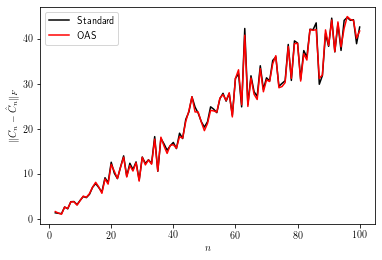

In [110]:
exercise_4('fro', "exercise-4-fro.pdf", "F")

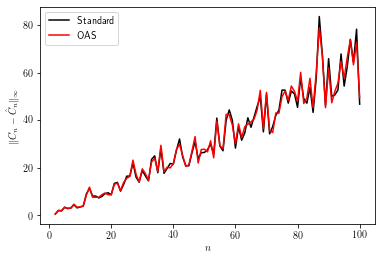

In [111]:
exercise_4(np.inf, "exercise-4-inf.pdf", "\infty")

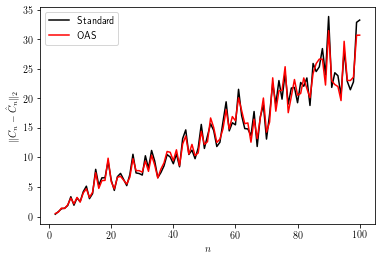

In [112]:
exercise_4(2, "exercise-4-norm2.pdf")

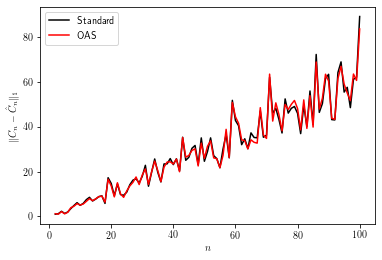

In [113]:
exercise_4(1, "exercise-4-norm1.pdf")

In [114]:
def exercise_5(ord, fig_name, ord_tex=None, theta=np.pi/3, n_max=100):
    if ord_tex is None:
        ord_tex = ord
    ns = np.array(range(2, n_max))
    trans = np.array([[np.cos(theta), -np.sin(theta)],
                      [np.sin(theta), np.cos(theta)]])
    norms = np.zeros((2, n_max - 2))
    for n in ns:
        A = np.random.uniform(low=-2, high=2, size=(2, 2))
        norms[0, n - 2] = np.linalg.norm(A, ord=ord)
        norms[1, n - 2] = np.linalg.norm(A.dot(trans), ord=ord)

    plt.scatter(norms[0, :], norms[1, :], s=5, c='k')
    plt.xlabel("$\lVert A \lVert_{" + str(ord_tex) + "}$")
    plt.ylabel("$\lVert A\Theta \lVert_{" + str(ord_tex) + "}$")
    save_fig(fig_name)
    plt.show()

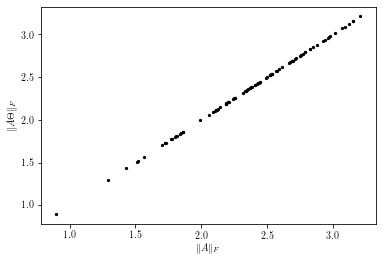

In [115]:
exercise_5('fro', "exercise-5-fro.pdf", ord_tex="F")

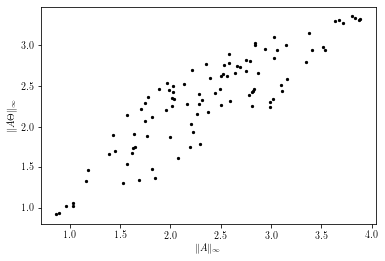

In [119]:
exercise_5(np.inf, "exercise-5-inf.pdf", ord_tex="\infty")

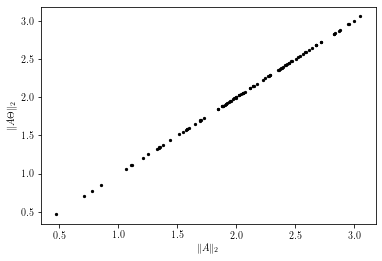

In [117]:
exercise_5(2, "exercise-5-norm2.pdf")

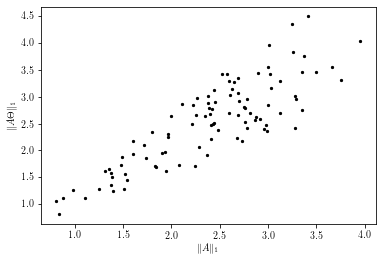

In [118]:
exercise_5(1, "exercise-5-norm1.pdf")

In [138]:
def exercise_7(u, s, vh, n_lambda, r_all=True):
    if r_all:
        matrices = []
    acum = np.zeros((u.shape[0], vh.shape[1]))
    for i in range(n_lambda):
        u_aux = np.reshape(u[:, i], (u.shape[0], 1))
        v_aux = np.reshape(vh[i, :], (1, vh.shape[0]))
        acum += u_aux.dot(v_aux) * s[i]
        if r_all:
            matrices.append(acum.copy())

    if r_all:
        return matrices
    else:
        return acum

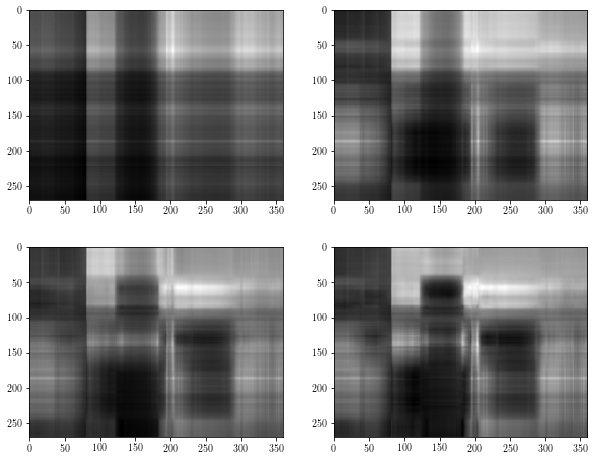

In [152]:
picture = np.array(Image.open("photo.jpg").convert("L"))
u, s, vh = np.linalg.svd(picture)
_, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plotting the first 4 images
images = exercise_7(u, s, vh, 4)
elems = [(0, 0), (0, 1), (1, 0), (1, 1)]
i = 0
for elem in elems:
    axs[elem].imshow(images[i], cmap='gray')
    i += 1
plt.show()

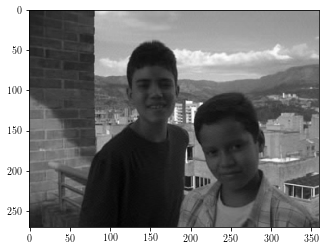

In [163]:
image = exercise_7(u, s, vh, 100, r_all=False)
plt.imshow(image, cmap='gray')
plt.show()